In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPool1D

In [9]:
df = pd.read_csv('./dataset/power_consumption.csv')

df

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [10]:
X = df.iloc[:, 1:6]
y = df.iloc[:, 6]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)

df

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [12]:
model = Sequential([
    Conv1D(input_shape=(X_train.shape[1], 1), filters=64, kernel_size=3, activation='relu'),
    Conv1D(filters=32, kernel_size=2, activation='relu'),
    MaxPool1D(),
    Flatten(),
    Dense(64, activation='relu'),    
    Dense(1)
])

model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 3, 64)             256       
                                                                 
 conv1d_3 (Conv1D)           (None, 2, 32)             4128      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 32)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                      

In [13]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.33, batch_size=32)

Epoch 1/100
736/736 [==============================] - 1s 1ms/step - loss: 251000240.0000 - val_loss: 92354952.0000
Epoch 2/100
736/736 [==============================] - 1s 1ms/step - loss: 68333336.0000 - val_loss: 80785864.0000
Epoch 3/100
736/736 [==============================] - 1s 1ms/step - loss: 61585804.0000 - val_loss: 64156740.0000
Epoch 4/100
736/736 [==============================] - 1s 1ms/step - loss: 54937868.0000 - val_loss: 64651848.0000
Epoch 5/100
736/736 [==============================] - 1s 1ms/step - loss: 52382240.0000 - val_loss: 65777712.0000
Epoch 6/100
736/736 [==============================] - 1s 1ms/step - loss: 51407140.0000 - val_loss: 65769964.0000
Epoch 7/100
736/736 [==============================] - 1s 1ms/step - loss: 50478996.0000 - val_loss: 86518336.0000
Epoch 8/100
736/736 [==============================] - 1s 1ms/step - loss: 49767996.0000 - val_loss: 74679896.0000
Epoch 9/100
736/736 [==============================] - 1s 1ms/step - loss: 4903

In [18]:
y_pred = model.predict(X_test)

541/541 [==============================] - 0s 481us/step


In [51]:
for i in range(len(y_pred)):
    print(f"{i + 1}번 데이터의 예측차 : {y_pred[i] - np.array(y_test)[i]}")

1번 데이터의 예측차 : [-2534.1055]
2번 데이터의 예측차 : [-2422.2031]
3번 데이터의 예측차 : [-2286.5586]
4번 데이터의 예측차 : [-2125.4062]
5번 데이터의 예측차 : [-2030.1055]
6번 데이터의 예측차 : [-1910.168]
7번 데이터의 예측차 : [-1741.4062]
8번 데이터의 예측차 : [-1433.0586]
9번 데이터의 예측차 : [-939.0547]
10번 데이터의 예측차 : [-383.15234]
11번 데이터의 예측차 : [118.921875]
12번 데이터의 예측차 : [685.6875]
13번 데이터의 예측차 : [1319.8438]
14번 데이터의 예측차 : [1840.3242]
15번 데이터의 예측차 : [2473.0547]
16번 데이터의 예측차 : [3166.2578]
17번 데이터의 예측차 : [3718.4062]
18번 데이터의 예측차 : [4342.383]
19번 데이터의 예측차 : [5020.957]
20번 데이터의 예측차 : [5860.4043]
21번 데이터의 예측차 : [6688.6094]
22번 데이터의 예측차 : [7194.451]
23번 데이터의 예측차 : [7813.668]
24번 데이터의 예측차 : [8487.072]
25번 데이터의 예측차 : [8907.502]
26번 데이터의 예측차 : [9449.395]
27번 데이터의 예측차 : [9908.203]
28번 데이터의 예측차 : [10445.3125]
29번 데이터의 예측차 : [10664.254]
30번 데이터의 예측차 : [10872.521]
31번 데이터의 예측차 : [11139.594]
32번 데이터의 예측차 : [11447.453]
33번 데이터의 예측차 : [11561.711]
34번 데이터의 예측차 : [11714.891]
35번 데이터의 예측차 : [11731.395]
36번 데이터의 예측차 : [11905.582]
37번 데이터의 예측차 : [12103.729]
38번 데이터의 

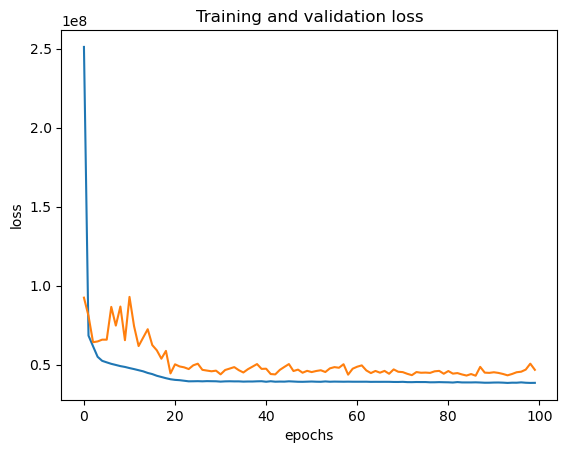

In [14]:
history.history.keys()
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
x = np.arange(0, 100)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])